In [56]:
import qutip as qp
from qutip import (basis, ket2dm, sigmay, sigmax, tensor, destroy, qeye, tracedist, sigmaz, Qobj,operations)
import numpy as np
import matplotlib.pyplot as plt
from qutip.qip.circuit import QubitCircuit
from qutip.qip.gates import snot
from qutip_qip.circuit import Gate

In [57]:
# Parameters
N = 2 # number of levels
M = 100
T = 500
delta = T / M
K = 500
epsilon = 1
omega = 0.05


In [59]:
a_t = qp.tensor(qp.qeye(2), qp.destroy(N))
H_a = omega * (
    a_t.dag() * np.exp(-1j * epsilon) + a_t * np.exp(1j * epsilon))
H_f = omega * a_t * a_t.dag()
H_i = np.kron(qp.sigmax(), a_t * np.exp(-1j * epsilon)) + np.kron(qp.sigmax().dag(), a_t.dag() * np.exp(1j * epsilon))
H_a = qp.tensor(H_a, qp.qeye(N))
H_f = qp.tensor(qp.qeye(N),H_f)


In [60]:
H_f.dims

[[2, 2, 2], [2, 2, 2]]

In [61]:
# Create the composite Hamiltonian
H_composite = H_a + H_f
H_composite

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[0.05      +0.j         0.        +0.j         0.02701512+0.04207355j
  0.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j         0.        +0.j        ]
 [0.        +0.j         0.        +0.j         0.        +0.j
  0.02701512+0.04207355j 0.        +0.j         0.        +0.j
  0.        +0.j         0.        +0.j        ]
 [0.02701512-0.04207355j 0.        +0.j         0.05      +0.j
  0.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j         0.        +0.j        ]
 [0.        +0.j         0.02701512-0.04207355j 0.        +0.j
  0.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j         0.        +0.j        ]
 [0.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j         0.05      +0.j         0.        +0.j
  0.02701512+0.04207355j 0.        +0.j        ]
 [0.        +0.

In [37]:
H_cc= qp.tensor(H_a, qp.qeye(N)) + qp.tensor(qp.qeye(N), H_f)
H_cc

Quantum object: dims = [[2, 2, 2, 2], [2, 2, 2, 2]], shape = (16, 16), type = oper, isherm = True
Qobj data =
[[0.05      +0.j         0.        +0.j         0.        +0.j
  0.        +0.j         0.02701512+0.04207355j 0.        +0.j
  0.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j        ]
 [0.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j         0.        +0.j         0.02701512+0.04207355j
  0.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j        ]
 [0.        +0.j         0.        +0.j         0.05      +0.j
  0.        +0.j         0.        +0.j         0.        +0.j
  0.02701512+0.04207355j 0.        +0.j         0.        +0.j
  0.       

In [38]:
# Calculate the noise and signal energy
U_F = np.zeros((N,N), dtype=complex)
for k in range(N):
    for n in range(N):
        U_F[k, n] = 1 / (np.sqrt(N)) * (np.exp(-2j * np.pi * k * n / N))
Hi_tilda = (
    (+1j * (H_a + H_f) * T).expm() * H_i * (-1j * (H_a + H_f) * T).expm().dag()
)
U_g = np.abs(U_F ** 10)
noise_energy = np.power(np.linalg.norm(U_g - np.eye(2), "fro"), 2)
signal_energy = np.power(np.linalg.norm(Hi_tilda), 2)
print("Interactive Hamiltonian",Qobj(H_i))
print("noise energy :", noise_energy)
print("signal energy :", signal_energy)
print(Hi_tilda.shape)


Interactive Hamiltonian Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[0.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j         0.        +0.j         0.54030231-0.84147098j
  0.        +0.j         0.        +0.j        ]
 [0.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j         0.54030231+0.84147098j 0.        +0.j
  0.        +0.j         0.        +0.j        ]
 [0.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j         0.54030231-0.84147098j]
 [0.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j         0.        +0.j         0.        +0.j
  0.54030231+0.84147098j 0.        +0.j        ]
 [0.        +0.j         0.54030231-0.84147098j 0.        +0.j
  0.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j         0.        +0.j        ]
 [0

In [39]:
hh=Qobj(U_F)
U_n=np.array([[32, 0],
       [0, 32]])


In [40]:
Unew=Qobj(np.kron(U_g, U_n))
Unew


Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[1. 0. 1. 0.]
 [0. 1. 0. 1.]
 [1. 0. 1. 0.]
 [0. 1. 0. 1.]]

In [41]:
# Calculate the noise-to-signal energy ratio
ratio = noise_energy / signal_energy
ratio_l=np.linspace(np.exp(-0.25),np.exp(-1),N+1)

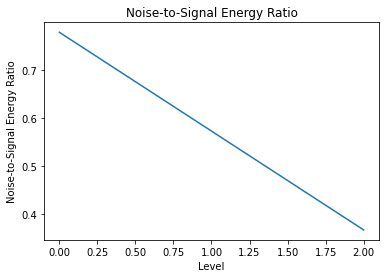

In [42]:
# Plot the ratio
plt.plot(range(N+1), ratio_l)
plt.xlabel('Level')
plt.ylabel('Noise-to-Signal Energy Ratio')
plt.title('Noise-to-Signal Energy Ratio')
plt.show()